# Feature Engineering
Preparing the data for ML

* Feature Transformation
  * Missing value imputation
  * Categorical Features
  * Outlier detection
  * Feature scaling
    * Standardization
    * Normalization
      * Min Max scaler
* Feature construction
* Feature selection
* Feature extraction
  * PCA

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df_new = df[:][['Age', 'EstimatedSalary']]
df_new.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
df_new.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(df_new, df['Purchased'], test_size=0.2, random_state=42)

In [ ]:
temp = scaler.fit_transform(x_train)

x_train_scaled = pd.DataFrame(temp, columns=['Age', 'EstimatedSalary'])
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=['Age', 'EstimatedSalary'])
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118


In [ ]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [ ]:
x_train_scaled.mean()

,0
Age,-2.775558e-16
EstimatedSalary,1.110223e-17


In [ ]:
import numpy as np
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


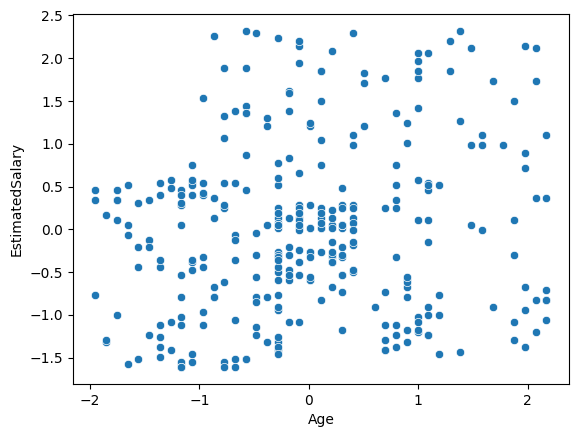

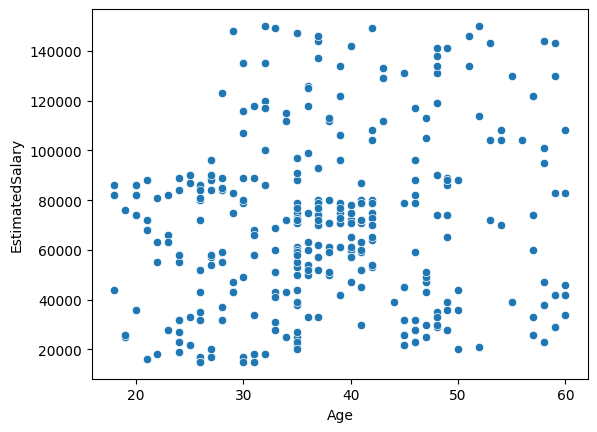

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=x_train_scaled, x='Age', y='EstimatedSalary')
plt.show()
sns.scatterplot(data=x_train, x='Age', y='EstimatedSalary')
plt.show()

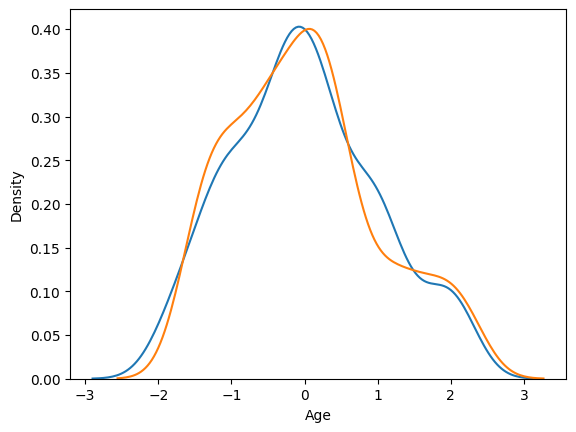

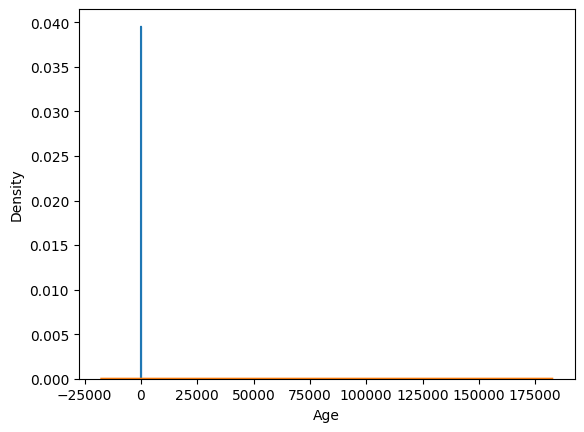

In [ ]:
sns.kdeplot(data=x_train_scaled, x='Age')
sns.kdeplot(data=x_train_scaled, x='EstimatedSalary')
plt.show()
sns.kdeplot(data=x_train, x='Age')
sns.kdeplot(data=x_train, x='EstimatedSalary')
plt.show()

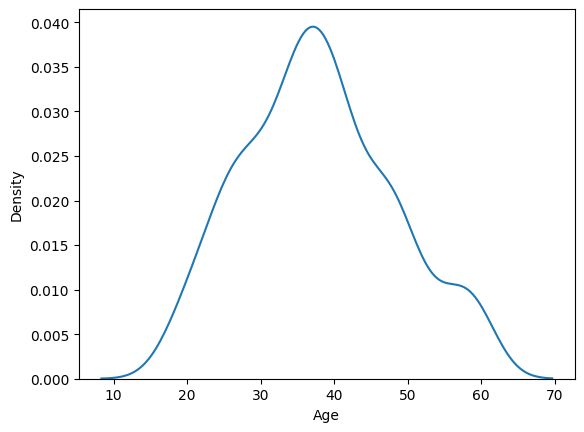

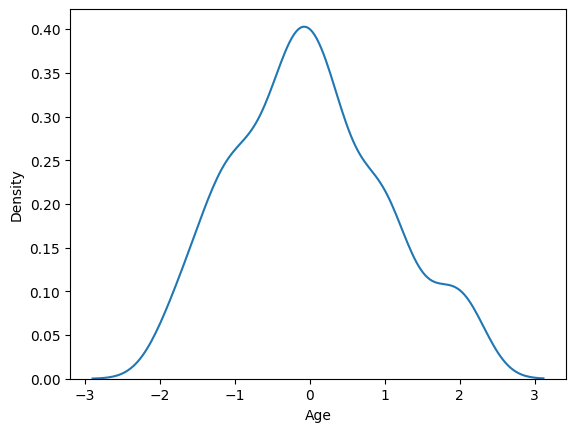

In [ ]:
sns.kdeplot(data=x_train, x='Age')
plt.show()
sns.kdeplot(data=x_train_scaled, x='Age')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [ ]:
score = accuracy_score(y_test, y_pred)
score_scaled = accuracy_score(y_test, y_pred_scaled)

In [ ]:
print(score, score_scaled)

0.65 0.8625


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [ ]:
score = accuracy_score(y_test, y_pred)
score_scaled = accuracy_score(y_test, y_pred_scaled)

In [ ]:
print(score, score_scaled)

0.8375 0.8375


# Normalization




In [ ]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=['Alcohol', 'Malic acid'])
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=['Alcohol', 'Malic acid'])

In [ ]:
x_train_scaled.describe()

,Alcohol,Malic acid
count,142.000000,142.000000
mean,0.512917,0.302143
std,0.215820,0.232980
min,0.000000,0.000000
25%,0.342763,0.147658
50%,0.521053,0.200611
75%,0.696711,0.457230
max,1.000000,1.000000


In [ ]:
x_train.describe()

,Alcohol,Malic acid
count,142.000000,142.000000
mean,12.979085,2.373521
std,0.820116,1.143934
min,11.030000,0.890000
25%,12.332500,1.615000
50%,13.010000,1.875000
75%,13.677500,3.135000
max,14.830000,5.800000


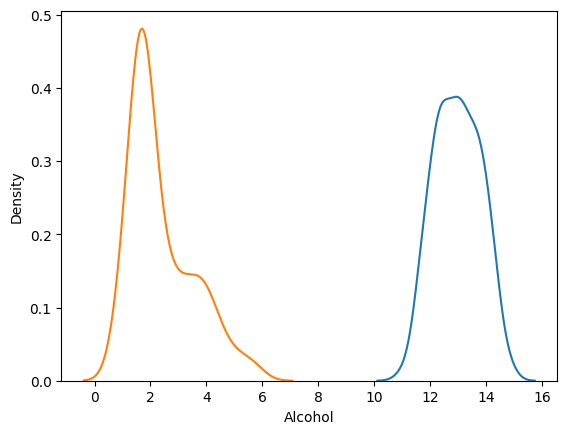

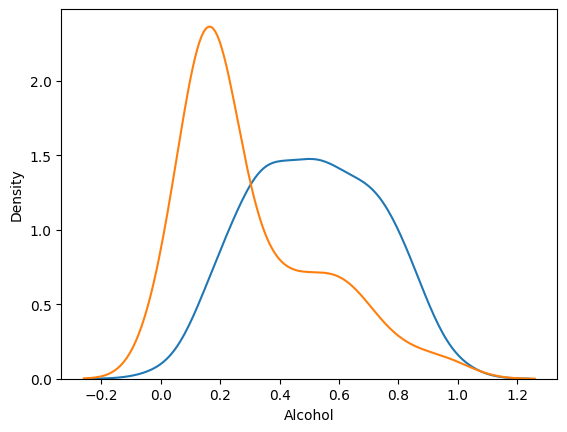

In [ ]:
sns.kdeplot(data=x_train, x='Alcohol')
sns.kdeplot(data=x_train, x='Malic acid')
plt.show()

sns.kdeplot(data=x_train_scaled, x='Alcohol')
sns.kdeplot(data=x_train_scaled, x='Malic acid')
plt.show()

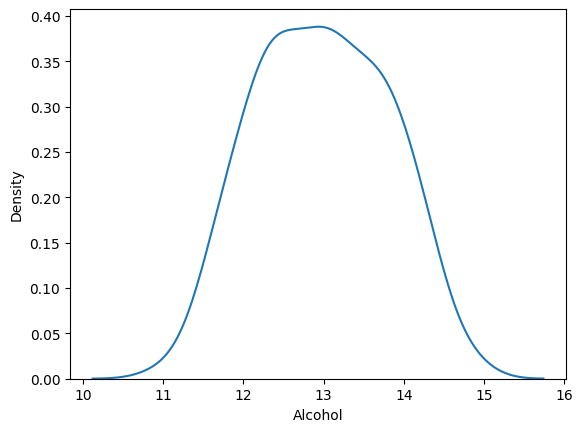

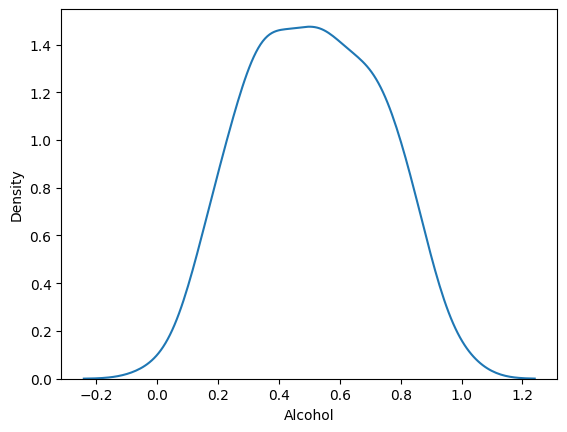

In [ ]:
sns.kdeplot(data=x_train, x='Alcohol')
plt.show()

sns.kdeplot(data=x_train_scaled, x='Alcohol')
plt.show()

## Encode categorical

* Nominal (branches in engineering)
  * One hot encoding
* Ordinal (ratings, grades)
* Label Encoding --> output labels


High School (HS) - 0
UG - 1
PG - 2
PHD - 3

The above is ordinal data

In [ ]:
customers = pd.read_csv('customer.csv')

In [ ]:
customers.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [ ]:
# gender - nominal
# review - ordinal
# education - ordinal
# purchase - label encoders
customers = customers.iloc[:, 2:]

In [ ]:
customers.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(customers.drop('purchased', axis=1), customers['purchased'], test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,review,education
12,Poor,School
4,Average,UG
37,Average,PG
8,Average,UG
3,Good,PG


In [ ]:
oe = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
x_train_encoded = pd.DataFrame(oe.transform(x_train), columns=['review', 'education'])
x_test_encoded = pd.DataFrame(oe.transform(x_test), columns=['review', 'education'])


In [ ]:
x_train_encoded.head()

,review,education
0,0.0,0.0
1,1.0,1.0
2,1.0,2.0
3,1.0,1.0
4,2.0,2.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
y_train_encoded = pd.DataFrame(le.transform(y_train), columns=['purchased'])
y_test_encoded = pd.DataFrame(le.transform(y_test), columns=['purchased'])

In [ ]:
y_train_encoded.head()

,purchased
0,0
1,0
2,1
3,0
4,0


In [ ]:
cars = pd.read_csv('cars.csv')

In [ ]:
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
cars['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [ ]:
cars['brand'].nunique()

32

In [ ]:
cars['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [ ]:
cars['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cars.iloc[:, 0:4], cars['selling_price'], test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner


In [ ]:
ohe = OneHotEncoder(drop='first')
x_train_encoded = ohe.fit_transform(x_train[['fuel', 'owner']])
x_test_encoded = ohe.transform(x_test[['fuel', 'owner']])

In [ ]:
x_train_encoded.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [ ]:
arr = np.hstack((x_train[['brand', 'km_driven']].values, x_train_encoded.toarray()))

In [ ]:
df = pd.DataFrame(arr)
df.head()

,0,1,2,3,4,5,6,7,8
0,Tata,2560,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Honda,80000,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Hyundai,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Maruti,120000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Maruti,25000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
ohe.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object)]

In [6]:
import pandas as pd
df = pd.read_csv('covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
tr = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(drop='first'), ['gender', 'city'])
], remainder='passthrough')

In [17]:
df_transformed = tr.fit_transform(df)

In [22]:
df_transformed.shape

(100, 8)

In [24]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [26]:
from sklearn.pipeline import Pipeline, make_pipeline

In [27]:
titanic.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [76]:
 trf1 = ColumnTransformer([
     ('impute_age', SimpleImputer(), [2]),
     ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])
 ], remainder='passthrough')

In [102]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [1, 6])
], remainder='passthrough')

In [103]:
from sklearn.preprocessing import MinMaxScaler
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0, 10))
])

In [104]:
from sklearn.feature_selection import SelectKBest, chi2
trf4 = SelectKBest(score_func=chi2, k=8)

In [105]:
from sklearn.tree import DecisionTreeClassifier

trf5 = DecisionTreeClassifier()

In [106]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])

In [107]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7f0a33ae5630>)),
                ('trf5', DecisionTreeClassifier())])

In [108]:
x_train = titanic.drop('Survived', axis=1)
y_train = titanic['Survived']

In [109]:
pipe.fit(x_train, y_train)
pipe.predict(x_train)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [110]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([29.69911765])

In [111]:
params = {
    'trf5__max_depth': [1,2,3,4,5,None]
}

In [112]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')

In [113]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x7f0a33ae5630>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [114]:
grid.best_score_

0.6364258364195594

In [115]:
grid.best_params_

{'trf5__max_depth': 3}